# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
}

student_data = pd.DataFrame(data)
student_data.set_index('StudentID', inplace=True)
student_data


,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

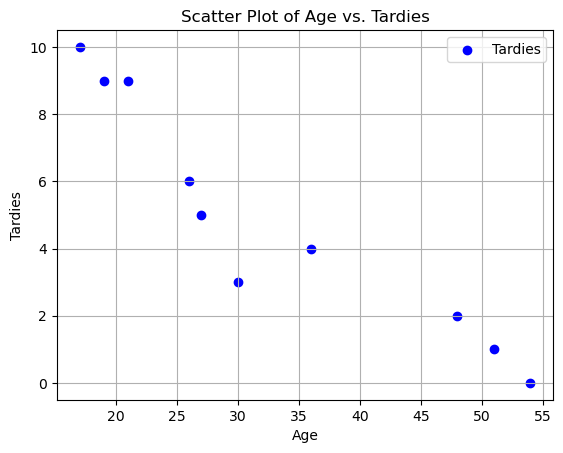

In [105]:
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', marker='o', label='Tardies')
plt.title('Scatter Plot of Age vs. Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.grid(True)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

***My hypotheses***

Based on the scatter plot, we can observe a clear trend: as age increases, the number of tardies generally decreases. 
This suggests a negative correlation between age and tardies.

In other words, it seems that older students tend to have fewer tardies compared to younger students. This trend could potentially be explained by factors such as maturity, time management skills, and responsibility improving as students get older.

However, while the scatter plot provides a visual indication of this relationship, it's important to note that correlation does not imply causation. 






--

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [106]:
covariance = student_data['Age'].cov(student_data['Tardies'])
print(f"Value of is ", covariance)
correlation = student_data['Age'].corr(student_data['Tardies'])
print(f"Value of is ", correlation) 

Value of is  -45.56666666666666
Value of is  -0.9391626886887122


***My Comments***

The correlation coefficient between 'Age' and 'Tardies' indicates the strength and direction of their linear relationship.

A negative value closer to -1 suggests a strong negative correlation (as age increases, tardies tend to decrease).

The negative covariance indicates an inverse relationship: as one variable increases, the other tends to decrease.

--

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [107]:
model = linear_model.LinearRegression()

x= student_data[["Age"]]
y = student_data["Tardies"]
model.fit(x, y)

#In this case, my outcome variable (dependent variable) will be 'Tardies', and my predictor variable (independent variable) will be 'Age'. 
#Since i'm are trying to predict the number of tardies based on the age of the students i can use a Simple Linear Regression model.

LinearRegression()

Plot your regression model on your scatter plot.

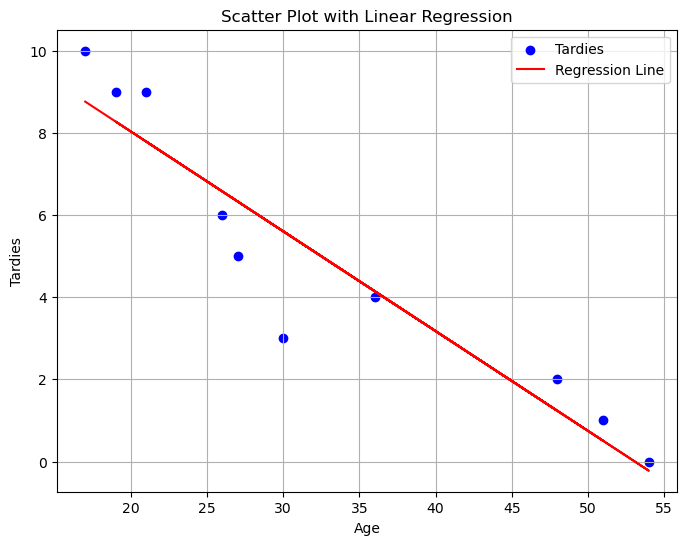

In [108]:
predictions = model.predict(x)

plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', marker='o', label='Tardies')
plt.plot(student_data['Age'], predictions, color='red', label='Regression Line')
plt.title('Scatter Plot with Linear Regression')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.grid(True)
plt.show()


In [109]:
model.score(x, y)

0.8820265558250109

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

***Interpretation and Conclusions***

The slope of the regression line (coefficient) represents the change in tardies for a unit change in age.
In this case, the negative slope indicates that, on average, as age increases, the number of tardies decreases.
The scatter plot with the regression line suggests a negative linear relationship between age and tardies.
The coefficient of determination (R-squared) value is 0.882, which implies that approximately 88.2% of the variance in tardiness can be explained by age in our linear regression model.
However, it's important to note that the scatter of data points around the regression line indicates variability.

***Confidence in Conclusions***

The conclusions drawn from the model are based on a linear assumption and are subject to assumptions of linear regression.
While the high R-squared value indicates a good fit of the data to the linear model, it's essential to perform additional analyses, such as assessing confidence intervals, conducting statistical tests, and considering other diagnostics, to fully assess the validity and reliability of the model.

***Is Age a Good Predictor of Tardiness?***

The linear regression model, with an R-squared value of 0.882, suggests a strong negative relationship between age and tardies. This high R-squared value indicates that a significant portion of the variability in tardiness can be explained by age. However, determining whether age is a "good" predictor involves considering multiple factors, including the coefficient value, scatter of data, and domain knowledge. While the model suggests a strong association, further in-depth analysis, cross-validation, and domain-specific insights are required to make a robust and well-grounded conclusion.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [110]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

vehicles = pd.read_csv("vehicles.csv")
vehicles.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [124]:
selected_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']
selected_df = vehicles [selected_variables]
correlations = selected_df.corr()
correlations

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


***My interpretation***
- Year: The correlation coefficient between 'Year' and 'CO2 Emission Grams/Mile' is approximately -0.2223. This suggests a weak negative correlation, indicating that newer vehicles tend to have slightly lower CO2 emissions.

 - Cylinders: The correlation coefficient between 'Cylinders' and 'CO2 Emission Grams/Mile' is approximately 0.7524. This indicates a moderate positive correlation, suggesting that vehicles with more cylinders tend to have higher CO2 emissions.

- Fuel Barrels/Year: The correlation coefficient between 'Fuel Barrels/Year' and 'CO2 Emission Grams/Mile' is approximately 0.9862. This indicates a very strong positive correlation, implying that fuel consumption (measured in barrels per year) is closely related to CO2 emissions.

- Combined MPG: The correlation coefficient between 'Combined MPG' and 'CO2 Emission Grams/Mile' is approximately -0.9262. This indicates a very strong negative correlation, suggesting that vehicles with higher combined miles per gallon (MPG) tend to have lower CO2 emissions.

- Fuel Cost/Year: The correlation coefficient between 'Fuel Cost/Year' and 'CO2 Emission Grams/Mile' is approximately 0.9309. This indicates a very strong positive correlation, suggesting that vehicles with higher annual fuel costs tend to have higher CO2 emissions.


***Most Important Variable: Among the selected variables, 'Fuel Barrels/Year' has the highest absolute correlation (0.9862) with 'CO2 Emission Grams/Mile'. This suggests that fuel consumption (measured in barrels per year) is likely the most important variable in determining CO2 emissions.

***Least Helpful Variable: Among the selected variables, 'Year' has the lowest absolute correlation (-0.2223) with 'CO2 Emission Grams/Mile'. While still having some correlation, it provides the least amount of helpful information for determining CO2 emissions compared to the other variables.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [112]:
#type of regression - Multilinear Regression
x = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']] 
y = vehicles['CO2 Emission Grams/Mile']

model = linear_model.LinearRegression()
model.fit(x,y)
model.score(x,y)

0.9808734920269122

In [113]:
red = model.predict(x)
np.sqrt(mean_squared_error(y,pred))

16.465711496024085

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

***Regression Summary***

- Coefficient of Determination (R-squared):
model.score(x, y) gave me an R-squared value of approximately 0.9809.
The R-squared value is a measure of how well the model explains the variability in the target variable ('CO2 Emission Grams/Mile'). It ranges from 0 to 1, where a higher value indicates a better fit.
An R-squared value of 0.9809 suggests that around 98.09% of the variance in the target variable can be explained by the independent variables included in your model. This is a high value and indicates a strong fit.

- Root Mean Squared Error (RMSE):
I calculate the RMSE using np.sqrt(mean_squared_error(y, pred)) and obtained a value of approximately 16.4657.
The RMSE is a measure of the average difference between the predicted values and the actual values (target variable).
In your case, an RMSE of 16.4657 means that, on average, your model's predictions of 'CO2 Emission Grams/Mile' are off by approximately 16.47 grams/mile.
The RMSE of 16.4657 indicates the average prediction error of my model in terms of 'CO2 Emission Grams/Mile'. Smaller RMSE values indicate better predictive performance, so 16.47 is relatively low considering the scale of the target variable

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [114]:
parties = {
    'Numb ppl invited': [1, 3, 4, 6, 8, 9, 11, 14],
    'Numb ppl who attended': [1, 2, 4, 4, 4, 7, 8, 13],
    }

parties_data = pd.DataFrame(parties)
parties_data
# parties_data.set_index('Numb ppl invited', inplace=True)
# parties_data

,Numb ppl invited,Numb ppl who attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,4
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

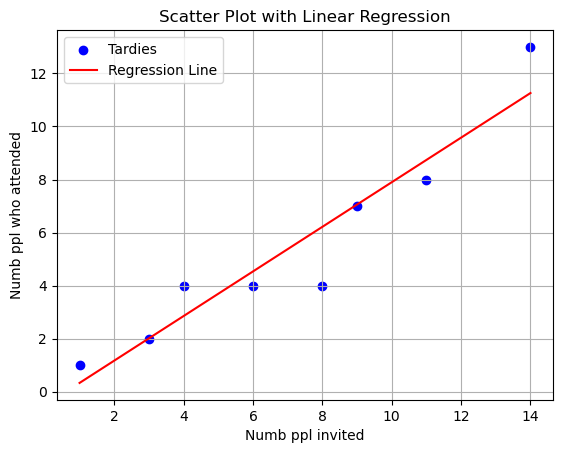

In [115]:
x = parties_data[['Numb ppl invited']]
y = parties_data[['Numb ppl who attended']]

model.fit(x, y)
predictions = model.predict(x)

plt.scatter(parties_data['Numb ppl invited'], parties_data['Numb ppl who attended'], color='blue', marker='o', label='Tardies')
plt.plot(parties_data['Numb ppl invited'], predictions, color='red', label='Regression Line')
plt.title('Scatter Plot with Linear Regression')
plt.xlabel('Numb ppl invited')
plt.ylabel('Numb ppl who attended')
plt.legend()
plt.grid(True)
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [116]:
r_squared = model.score(parties_data[['Numb ppl invited']], parties_data['Numb ppl who attended'])
print("R-squared score:", r_squared)

R-squared score: 0.8985887758450934


In [117]:
covariance = parties_data['Numb ppl invited'].cov(parties_data['Numb ppl who attended'])
print(f"Value of is ", covariance)
correlation = parties_data['Numb ppl invited'].corr(parties_data['Numb ppl who attended'])
print(f"Value of is ", correlation) 


Value of is  15.857142857142856
Value of is  0.9479392258183503


***My Insights***
- The calculated covariance of approximately 15.86 suggests a positive relationship between the number of people invited and the number of people who attended your parties. This aligns with the observation from the scatter plot and the regression analysis.

- Correlation, on the other hand, is a standardized measure that indicates both the strength and direction of the linear relationship between two variables. The correlation coefficient ranges from -1 to 1. A positive correlation coefficient closer to 1 indicates a strong positive linear relationship.
The calculated correlation coefficient of approximately 0.948 suggests a strong positive correlation between the number of people invited and the number of people who attended your parties. This reinforces the idea that when you invite more people, more people tend to attend your parties.

Overall, both the covariance and correlation calculations support the notion of a positive relationship between the number of people invited and the number of people who attended your parties.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [118]:
parties_data_clean = parties_data.drop(parties_data.index[-1])
parties_data_clean #remove the promblematic point

,Numb ppl invited,Numb ppl who attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,4
5,9,7
6,11,8


In [119]:
model = linear_model.LinearRegression()
model.fit(parties_data_clean[['Numb ppl invited']], parties_data_clean['Numb ppl who attended'])
model.score(parties_data_clean[['Numb ppl invited']], parties_data_clean['Numb ppl who attended'])

0.8788670148654079

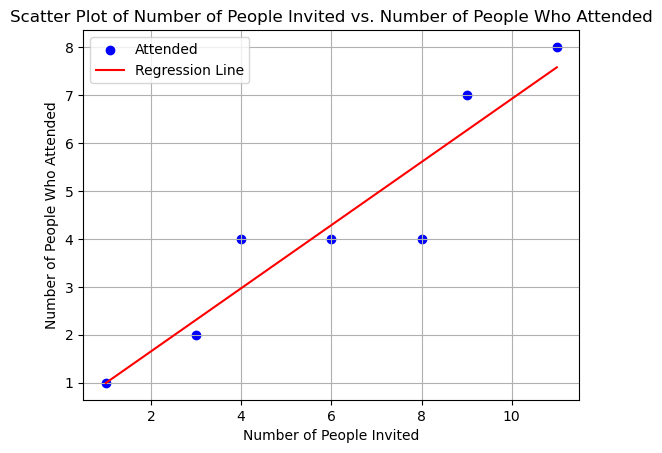

In [120]:
reg = model.intercept_ + model.coef_[0] * parties_data_clean['Numb ppl invited']
plt.scatter(parties_data_clean['Numb ppl invited'], parties_data_clean['Numb ppl who attended'], color='blue', label='Attended')
plt.plot(parties_data_clean['Numb ppl invited'], reg, color='red', label='Regression Line')
plt.title('Scatter Plot of Number of People Invited vs. Number of People Who Attended')
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Who Attended')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
r_squared_2 = model.score(parties_data_clean[['Numb ppl invited']], parties_data_clean['Numb ppl who attended'])
print("R-squared score after remove outlier :", r_squared_2)

r_squared = model.score(parties_data[['Numb ppl invited']], parties_data['Numb ppl who attended'])
print("R-squared score before remove outlier :", r_squared)


R-squared score after remove outlier : 0.8788670148654079
R-squared score before remove outlier : 0.841693209979973


***My Insights***

- The R-squared score increased after removing the outlier. This suggests that the regression model with the outlier removed better explains the variability in the data compared to the model that included the outlier. In other words, the model without the outlier provides a better fit to the majority of the data points.

- Additionally, based on the description of the graph, the regression line after removing the outlier likely fits the majority of the data points more closely. This indicates that the problematic point was exerting a strong influence on the original model's fit and removing it resulted in a more accurate representation of the overall trend in the data.

- Removing the outlier improved the model's fit and increased the R-squared value, indicating a more reliable and accurate representation of the relationship between the number of people invited and the number of people who attended the parties. The form of the data without the outlier appears to follow a more consistent and linear pattern.